# **Proyek Pertama: Menyelesaikan Permasalahan Institusi Pendidikan (Jaya Jaya Institut)**

---

*   Nama : Faishal Anwar Hasyim
*   Email : anwarfaishal86@gmail.com
*   Id Dicoding : anwarfaishal86

# Persiapan

Menyiapkan Library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import missingno

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
import joblib

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = None

Menyiapkan data yang akan diguankan

In [ ]:
# Baca file dengan delimiter ; dan encoding UTF-8 dengan BOM
students_df = pd.read_csv("students_performance.csv", sep=';')

# Tampilkan beberapa baris awal
students_df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  Mothers_occupation  Fathers_occupation  \
0                     12                   5                   9   
1                      3                   3                   3   
2                     37                   9                   9   
3                     37                   5                   3   
4                     38                   9                   9   

   Admission_grade  Displaced  Educational_special_needs  Debtor  \
0            127.3          1                          0       0   
1            142.5          1                          0       0   
2            124.8          1                          0       0   
3            119.6          1                          0       0   
4            141.5          0                          0       0   

   Tuition_fees_up_to_date  Gender  Scholarship_holder  Age_at_enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular_units_1st_sem_credited  \
0              0                                  0   
1              0                                  0   
2              0                                  0   
3              0                                  0   
4              0                                  0   

   Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                     8   
4                                  6                                     9   

   Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                                  0                        0.000000   
1                                  6                       14.000000   
2                                  0                        0.000000   
3                                  6                       13.428571   
4                                  5                       12.333333   

   Curricular_units_1st_sem_without_evaluations  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Curricular_u

# Data Understanding

In [ ]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
students_df.describe()

Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                   4424.000000  4424.000000            4424.000000   
mean                     132.613314     1.873192              19.561935   
std                       13.188332     6.914514              15.603186   
min                       95.000000     1.000000               1.000000   
25%                      125.000000     1.000000               2.000000   
50%                      133.100000     1.000000              19.000000   
75%                      140.000000     1.000000              37.000000   
max                      190.000000   109.000000              44.000000   

       Fathers_qualification  Mothers_occupation  Fathers_occupation  \
count            4424.000000         4424.000000         4424.000000   
mean               22.275316           10.960895           11.032324   
std                15.343108           26.418253           25.263040   
min                 1.000000            0.000000            0.000000   
25%                 3.000000            4.000000            4.000000   
50%                19.000000            5.000000            7.000000   
75%                37.000000            9.000000            9.000000   
max                44.000000          194.000000          195.000000   

       Admission_grade    Displaced  Educational_special_needs       Debtor  \
count      4424.000000  4424.000000                4424.000000  4424.000000   
mean        126.978119     0.548373                   0.011528     0.113698   
std          14.482001     0.497711                   0.106760     0.317480   
min          95.000000     0.000000                   0.000000     0.000000   
25%         117.900000     0.000000                   0.000000     0.000000   
50%         126.100000     1.000000                   0.000000     0.000000   
75%         134.800000     1.000000                   0.000000     0.000000   
max         190.000000     1.000000                   1.000000     1.000000   

       Tuition_fees_up_to_date       Gender  Scholarship_holder  \
count              4424.000000  4424.000000         4424.000000   
mean                  0.880651     0.351718            0.248418   
std                   0.324235     0.477560            0.432144   
min                   0.000000     0.000000            0.000000   
25%                   1.000000     0.000000            0.000000   
50%                   1.000000     0.000000            0.000000   
75%                   1.000000     1.000000            0.000000   
max                   1.000000     1.000000            1.000000   

       Age_at_enrollment  International  Curricular_units_1st_sem_credited  \
count        4424.000000    4424.000000                       

In [ ]:
students_df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0
International                                   0
Curricular_units_1st_sem_credited               0
Curricular_units_1st_sem_enrolled               0
Curricular_units_1st_sem_evaluations            0
Curricular_units_1st_sem_approved               0
Curricular_units_1st_sem_grade                  0
Curricular_units_1st_sem_without_evaluations    0
Curricular_units_2nd_sem_credited               0
Curricular_units_2nd_sem_enrolled               0
Curricular_units_2nd_sem_evaluations            0
Curricular_units_2nd_sem_approved               0
Curricular_units_2nd_sem_grade                  0
Curricular_units_2nd_sem_without_evaluations    0
Unemployment_rate                               0
Inflation_rate                                  0
GDP                                             0
Status                                          0
dtype: int64

In [ ]:
exploratory_df = students_df.copy()

# Marital status
marital_status_map = {
    1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
    5: 'Facto Union', 6: 'Legally Separated'
}

# Application mode
application_mode_map = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Course
course_map = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Daytime/evening attendance
attendance_map = {1: 'Daytime', 0: 'Evening'}

# Gender
gender_map = {1: 'Male', 0: 'Female'}

# Binary Yes/No fields
yes_no_map = {1: 'Yes', 0: 'No'}

# Previous qualification
previous_qualification_map = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master (2nd cycle)",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: "Higher education - master's degree",
}


# Nationality
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
    14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
    24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
    41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}

qualification_mother_map = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.', 2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree', 4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate', 6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed', 10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)', 12: 'Other - 11th Year of Schooling', 14: '10th Year of Schooling',
    18: 'General commerce course', 19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-professional course', 26: '7th year of schooling',
    27: '2nd cycle of the general high school course', 29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling', 34: 'Unknown', 35: "Can't read or write",
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course', 40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course', 42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)', 44: 'Higher Education - Doctorate (3rd cycle)'
}

qualification_father_map = qualification_mother_map.copy()
qualification_father_map.update({
    13: '2nd year complementary high school course',
    20: 'Complementary High School Course',
    25: 'Complementary High School Course - not concluded',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration'
})


# Occupation
occupation_mother_map = {
    0: 'Student', 1: 'Legislative / Executive / Directors', 2: 'Intellectual and Scientific Activities',
    3: 'Technicians and Professionals', 4: 'Administrative Staff', 5: 'Services, Security, Sellers',
    6: 'Agriculture, Fisheries, Forestry', 7: 'Industry, Construction, Craftsmen',
    8: 'Machine Operators and Assembly', 9: 'Unskilled Workers', 10: 'Armed Forces',
    90: 'Other Situation', 99: '(blank)', 122: 'Health professionals', 123: 'Teachers',
    125: 'ICT Specialists', 131: 'Science & Engineering Techs',
    132: 'Health Techs', 134: 'Legal/Social/Cultural Techs',
    141: 'Office Workers', 143: 'Finance/Registry Operators',
    144: 'Admin Support', 151: 'Service Workers', 152: 'Sellers',
    153: 'Personal Care Workers', 171: 'Construction Workers',
    173: 'Artisan Workers', 175: 'Industry Craftsmen',
    191: 'Cleaning Workers', 192: 'Unskilled Agriculture Workers',
    193: 'Unskilled Industry Workers', 194: 'Meal Prep Assistants'
}

occupation_father_map = occupation_mother_map.copy()
occupation_father_map.update({
    101: 'Armed Forces Officers', 102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces Personnel', 112: 'Administrative Directors',
    114: 'Hotel & Trade Directors', 121: 'Physical Science Specialists',
    124: 'Finance & Admin Specialists', 135: 'ICT Technicians',
    154: 'Security Personnel', 161: 'Market-Oriented Farmers',
    163: 'Subsistence Farmers', 172: 'Metallurgy Workers',
    174: 'Electricians', 181: 'Plant Operators',
    182: 'Assembly Workers', 183: 'Vehicle Drivers',
    195: 'Street Vendors'
})


# Mapping apply
exploratory_df['Marital_status'] = exploratory_df['Marital_status'].replace(marital_status_map)
exploratory_df['Application_mode'] = exploratory_df['Application_mode'].replace(application_mode_map)
exploratory_df['Course'] = exploratory_df['Course'].replace(course_map)
exploratory_df['Daytime_evening_attendance'] = exploratory_df['Daytime_evening_attendance'].replace(attendance_map)
exploratory_df['Gender'] = exploratory_df['Gender'].replace(gender_map)

# Binary columns
binary_cols = [
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Scholarship_holder', 'International'
]
for col in binary_cols:
    exploratory_df[col] = exploratory_df[col].replace(yes_no_map)

# Additional categorical fields
exploratory_df['Previous_qualification'] = exploratory_df['Previous_qualification'].replace(previous_qualification_map)
exploratory_df['Nacionality'] = exploratory_df['Nacionality'].replace(nationality_map)
exploratory_df['Mothers_qualification'] = exploratory_df['Mothers_qualification'].replace(qualification_mother_map)
exploratory_df['Fathers_qualification'] = exploratory_df['Fathers_qualification'].replace(qualification_father_map)
exploratory_df['Mothers_occupation'] = exploratory_df['Mothers_occupation'].replace(occupation_mother_map)
exploratory_df['Fathers_occupation'] = exploratory_df['Fathers_occupation'].replace(occupation_father_map)


# Tampilkan hasil
exploratory_df.head()


Marital_status                  Application_mode  Application_order  \
0         Single    2nd phase - general contingent                  5   
1         Single  International student (bachelor)                  1   
2         Single    1st phase - general contingent                  5   
3         Single    2nd phase - general contingent                  2   
4        Married                 Over 23 years old                  1   

                                Course Daytime_evening_attendance  \
0      Animation and Multimedia Design                    Daytime   
1                              Tourism                    Daytime   
2                 Communication Design                    Daytime   
3         Journalism and Communication                    Daytime   
4  Social Service (evening attendance)                    Evening   

  Previous_qualification  Previous_qualification_grade Nacionality  \
0    Secondary education                         122.0  Portuguese   
1    Secondary education                         160.0  Portuguese   
2    Secondary education                         122.0  Portuguese   
3    Secondary education                         122.0  Portuguese   
4    Secondary education                         100.0  Portuguese   

                                      Mothers_qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
1       Secondary Education - 12th Year of Schooling or Eq.   
2        Basic education 1st cycle (4th/5th year) or equiv.   
3    Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.   
4        Basic education 1st cycle (4th/5th year) or equiv.   

                                    Fathers_qualification  \
0                          Other - 11th Year of Schooling   
1                               Higher Education - Degree   
2      Basic education 1st cycle (4th/5th year) or equiv.   
3      Basic education 1st cycle (4th/5th year) or equiv.   
4  Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.   

              Mothers_occupation             Fathers_occupation  \
0    Services, Security, Sellers              Unskilled Workers   
1  Technicians and Professionals  Technicians and Professionals   
2              Unskilled Workers              Unskilled Workers   
3    Services, Security, Sellers  Technicians and Professionals   
4              Unskilled Workers              Unskilled Workers   

   Admission_grade Displaced Educational_special_needs Debtor  \
0            127.3       Yes                        No     No   
1            142.5       Yes                        No     No   
2            124.8       Yes                        No     No   
3            119.6       Yes                        No     No   
4            141.5        No                        No     No   

  Tuition_fees_up_to_date  Gender Scholarship_holder  Age_at_enrollment  \
0                     Yes    Male                 No                 20   
1                      No    Male                 No                 19   
2                      No    Male                 No                 19   
3                     Yes  Female                 No                 20   
4                     Yes  Female                 No                 45   

  International  Curricular_units_1st_sem_credited  \
0            No                                  0   
1            No                                  0   
2            No                                  0   
3            No                                  0   
4            No                                  0   

   Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                     8   
4                    

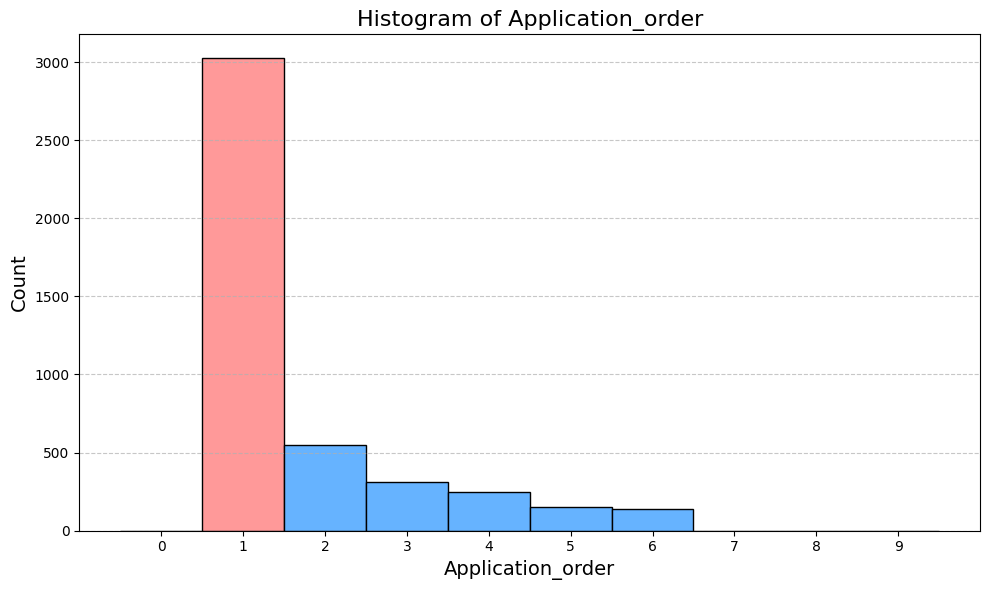

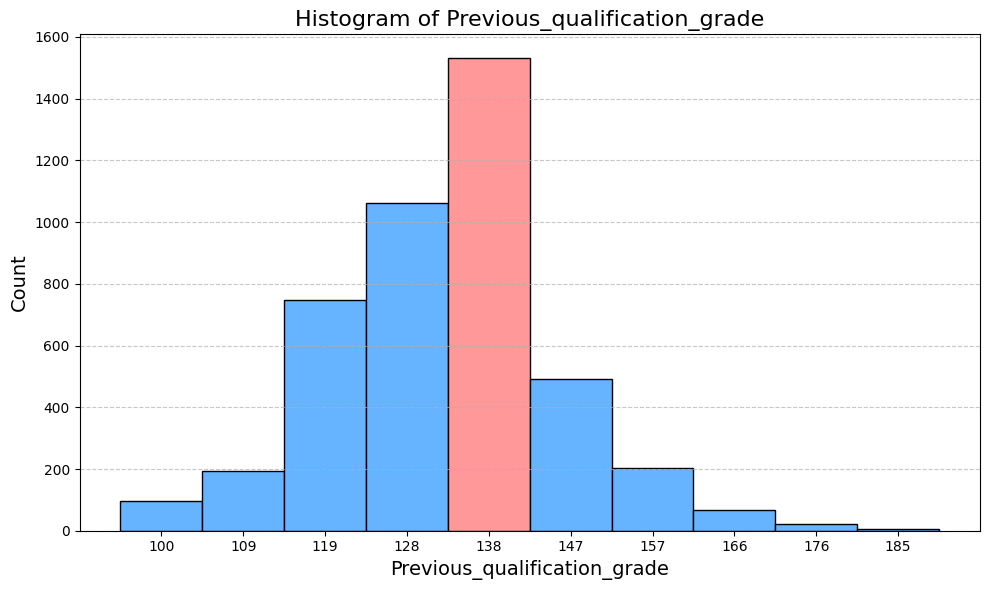

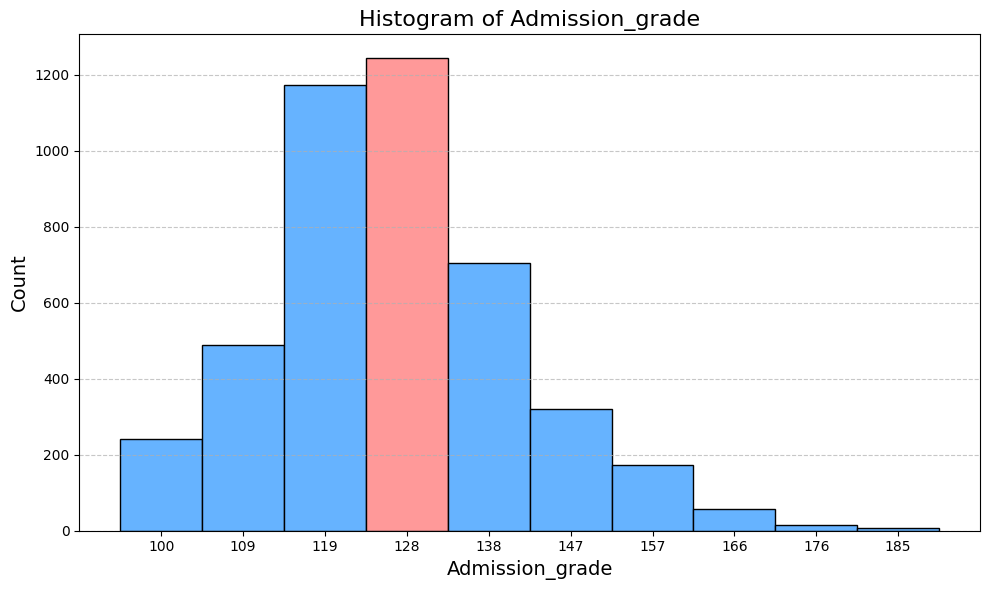

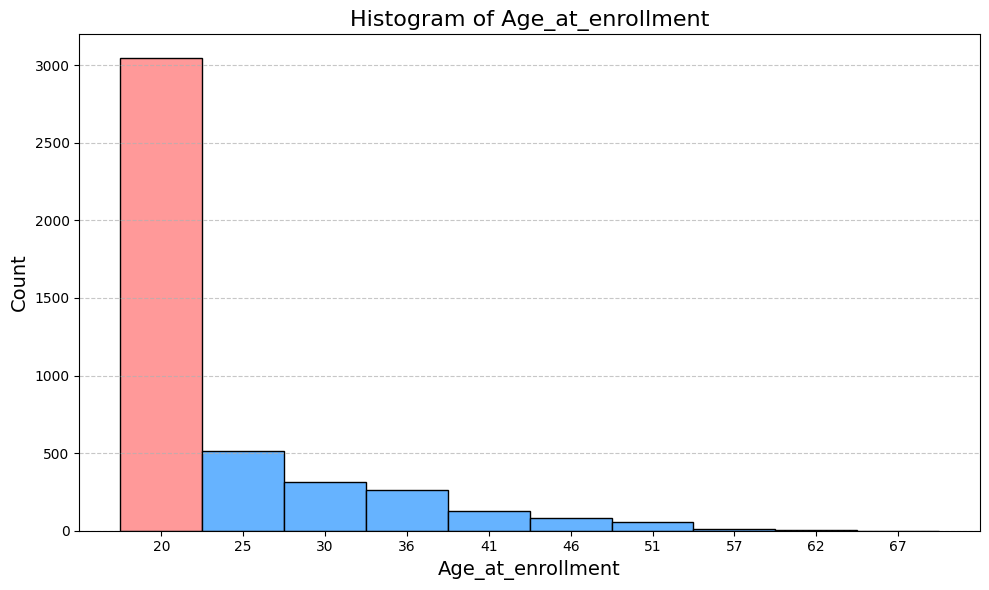

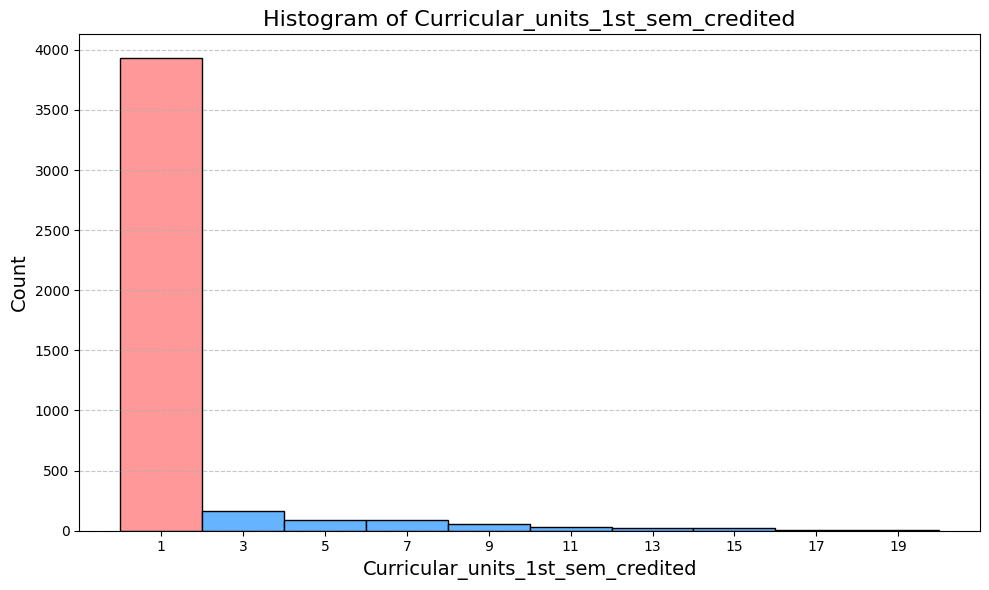

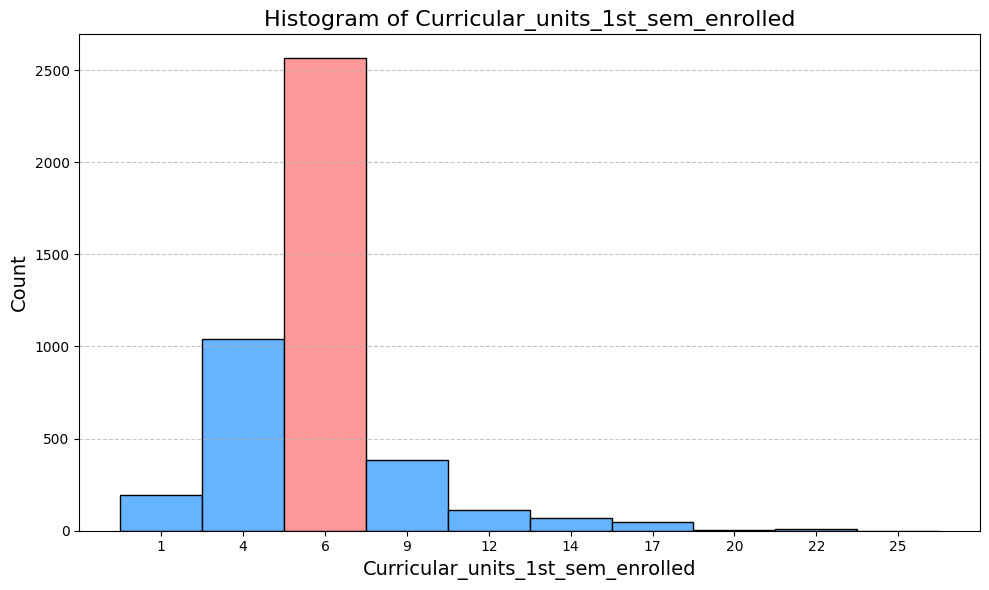

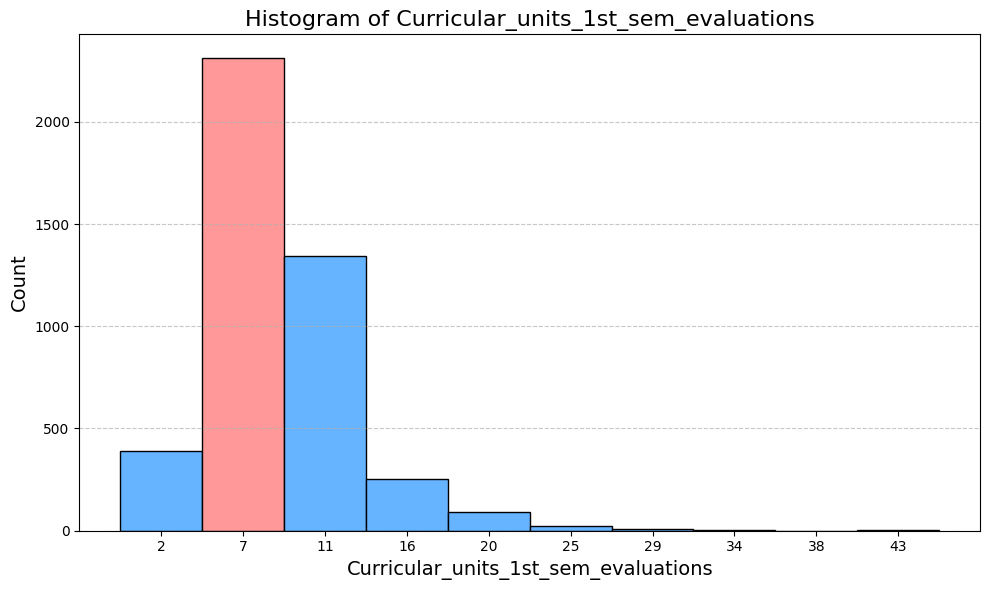

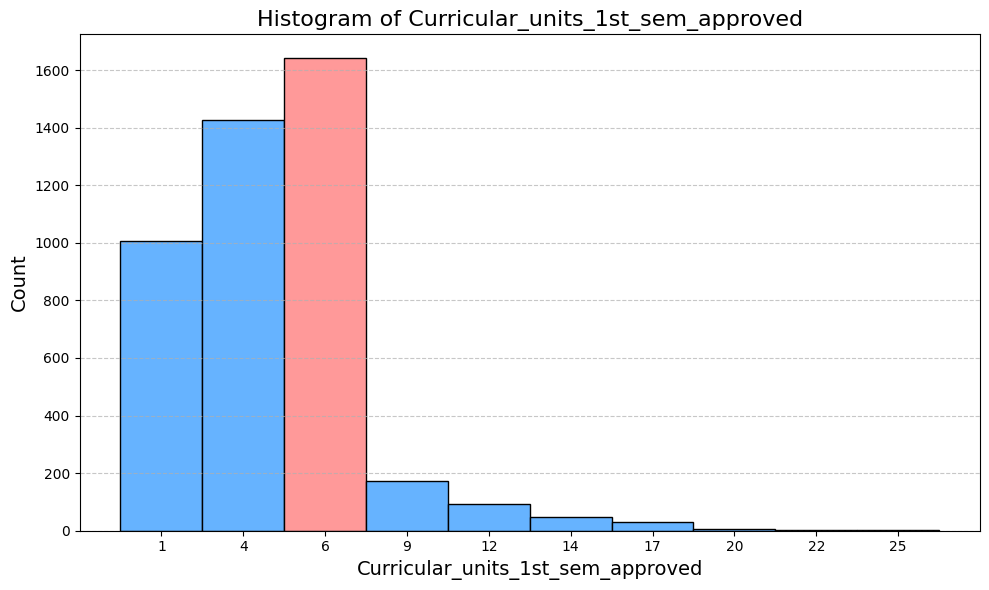

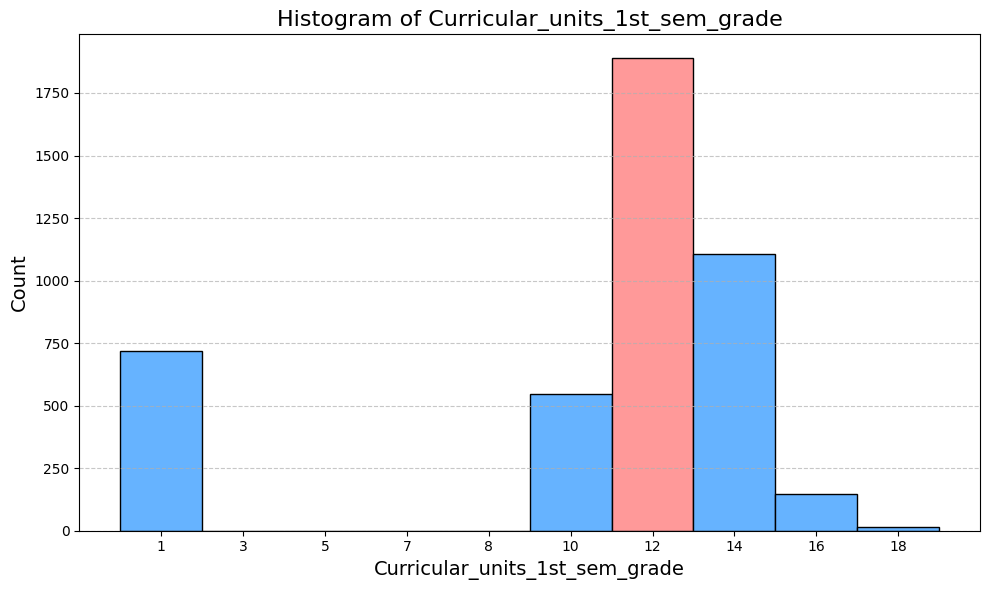

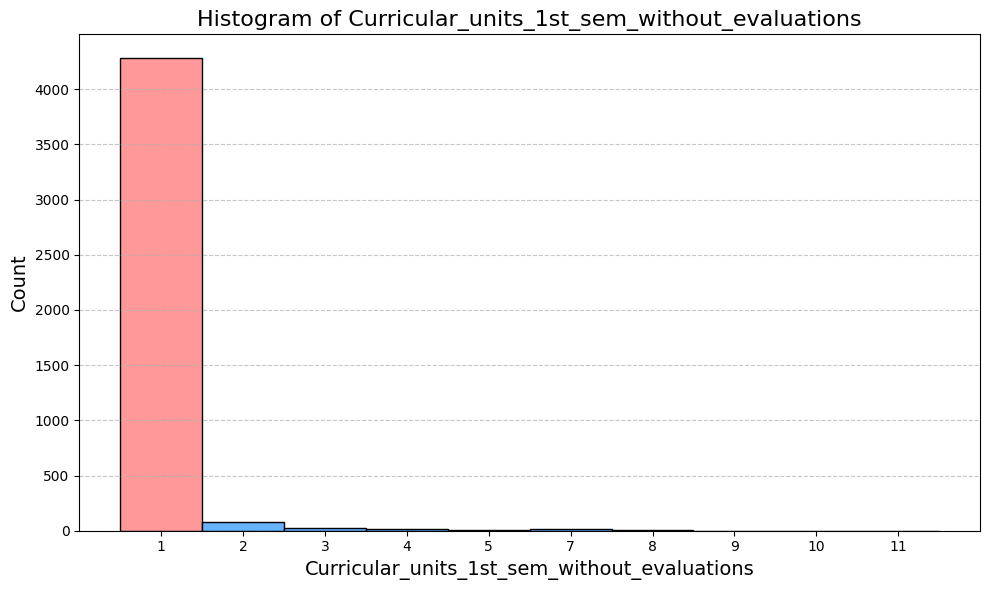

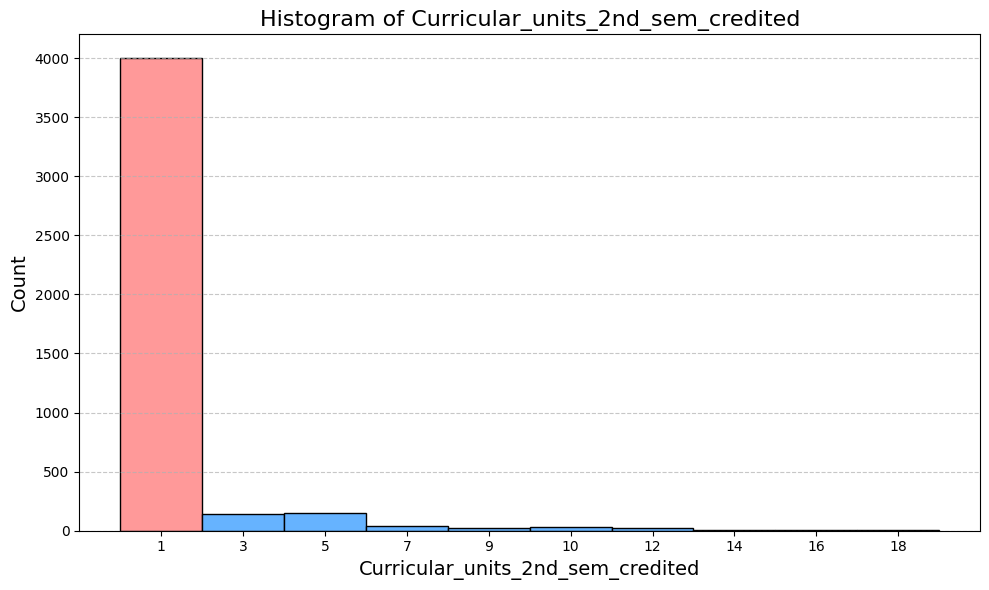

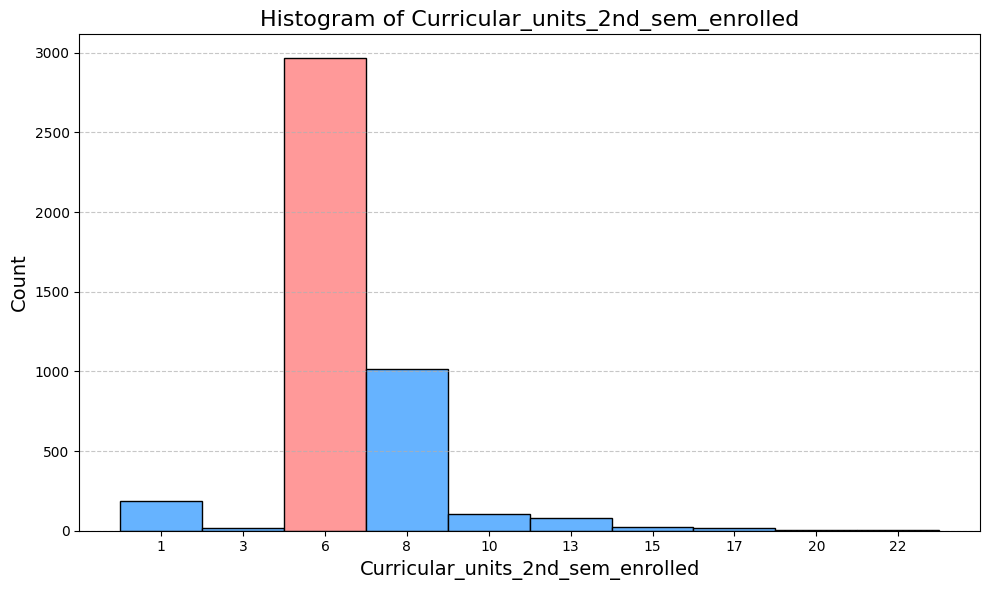

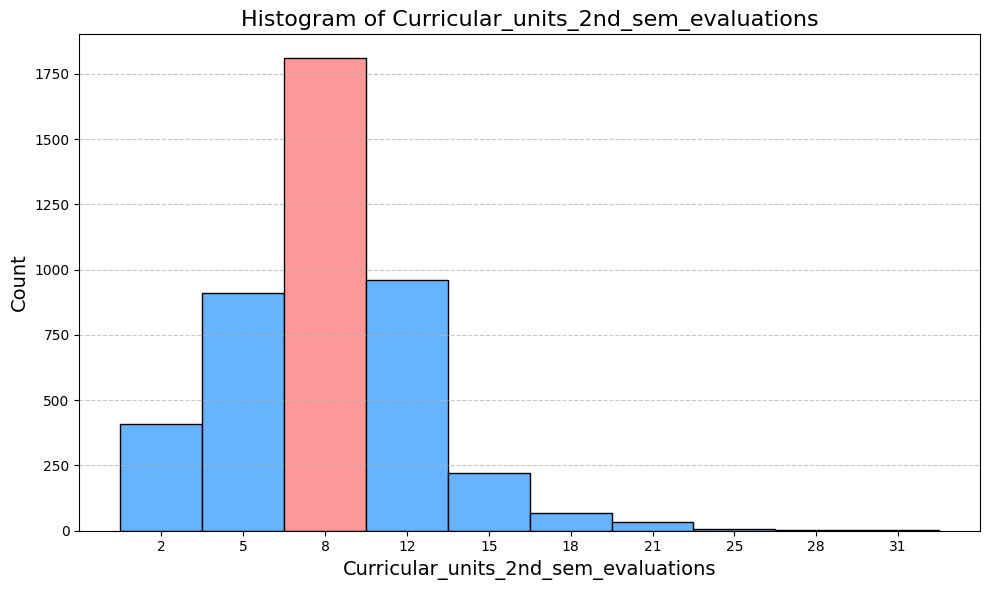

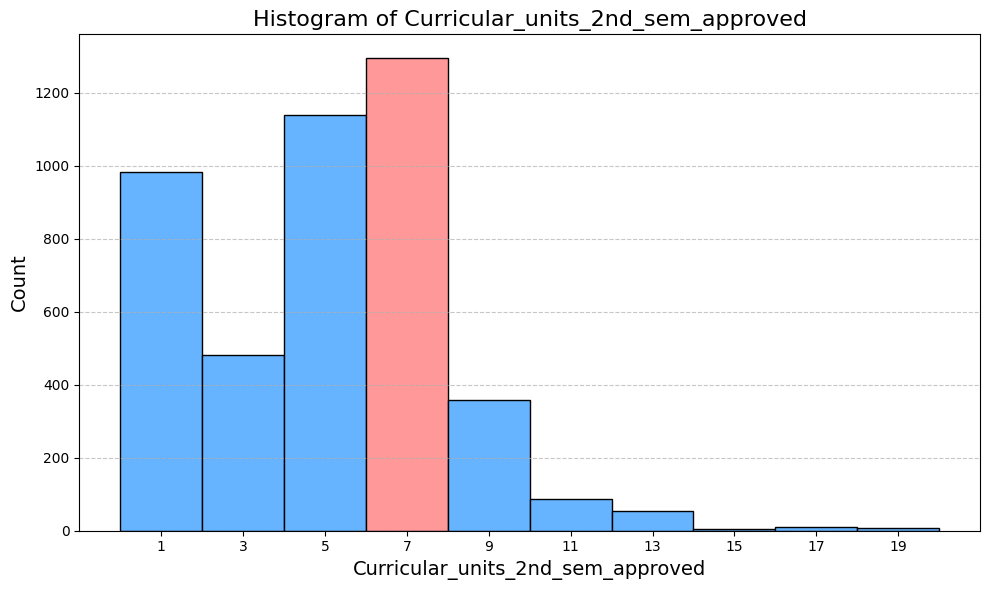

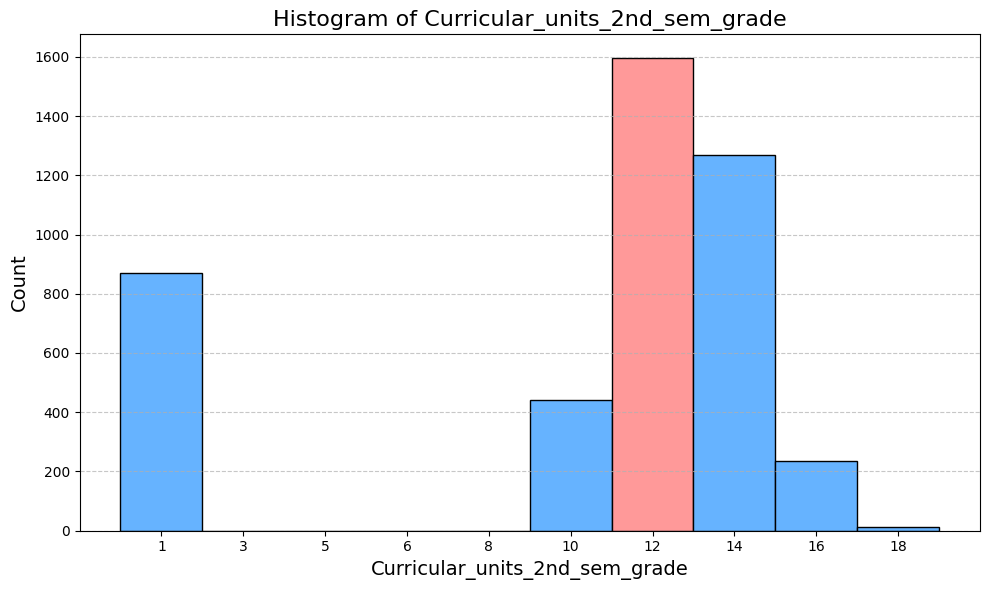

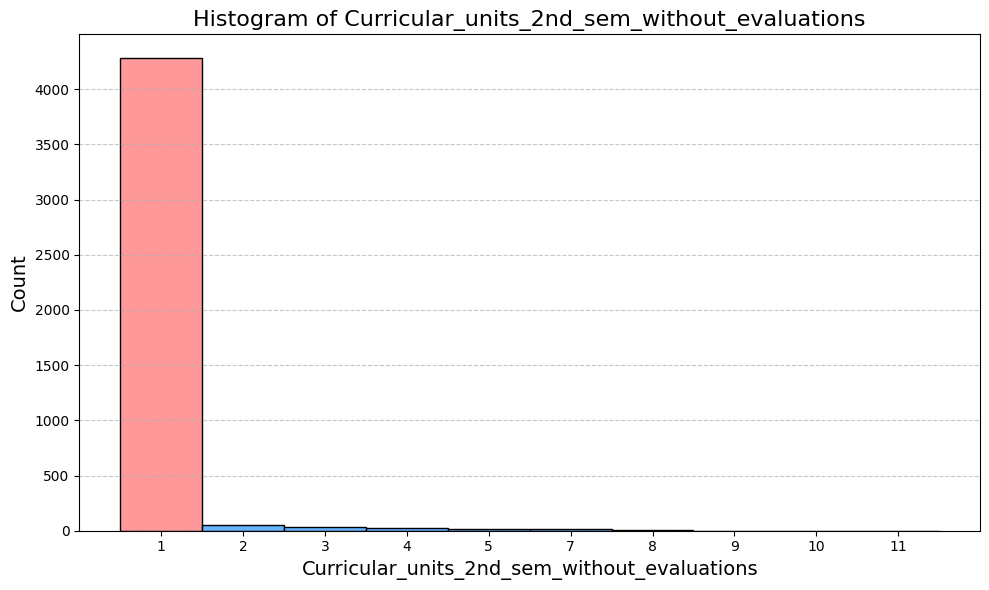

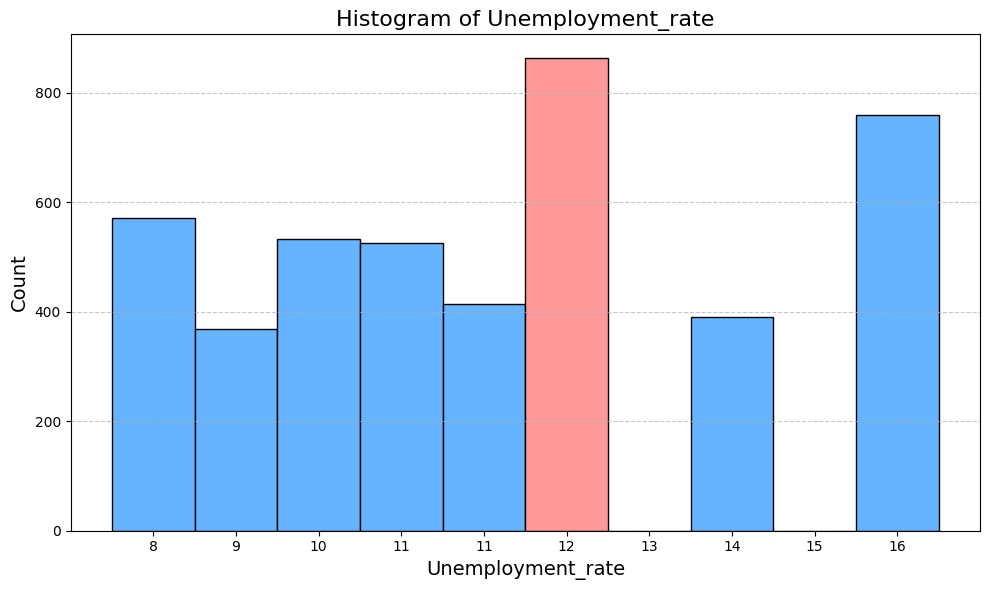

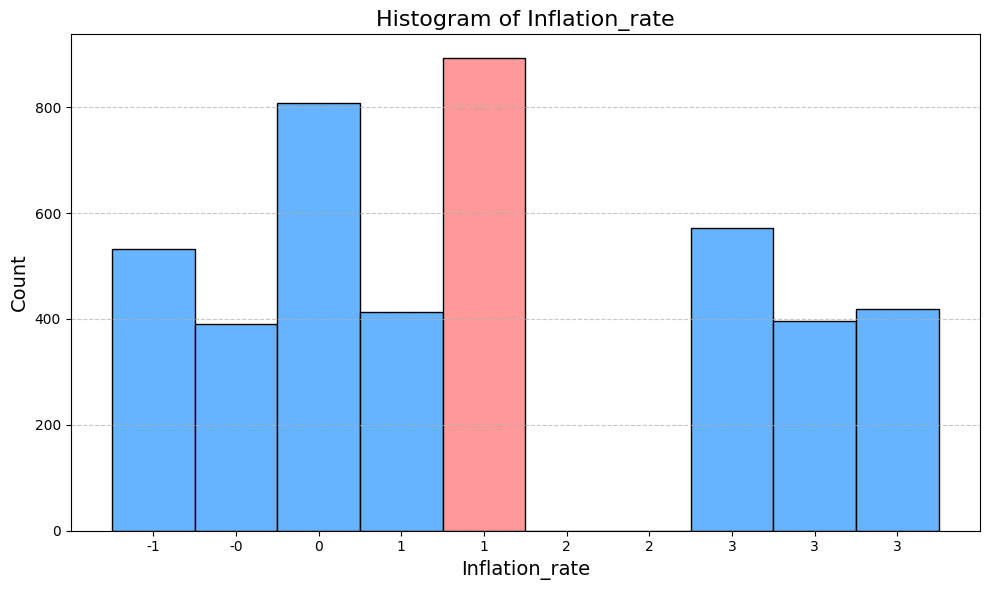

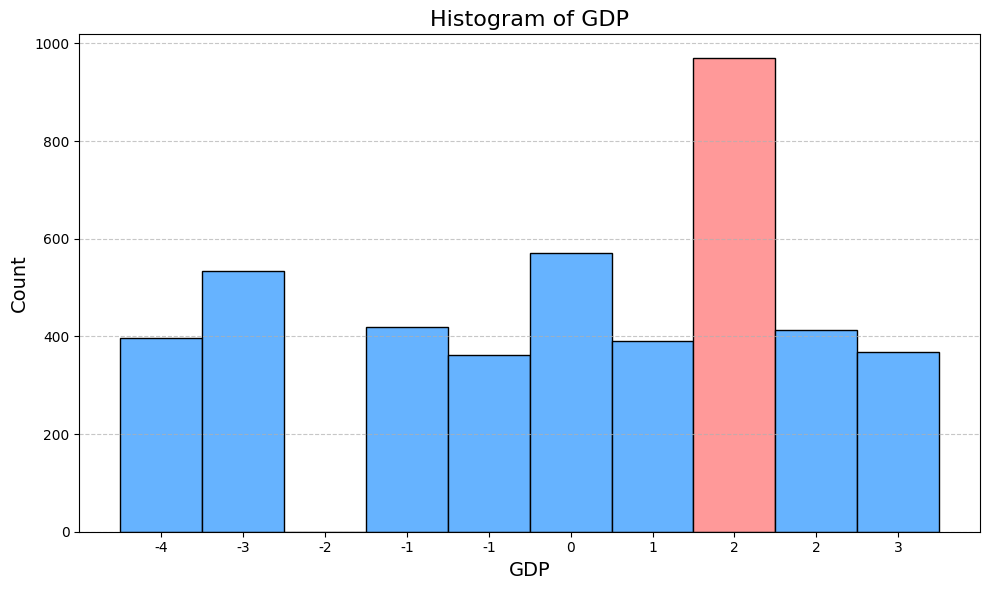

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Daftar fitur numerik yang benar
numerical = [
    "Application_order", "Previous_qualification_grade",
    "Admission_grade", "Age_at_enrollment",
    "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations",
    "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade", "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_grade", "Curricular_units_2nd_sem_without_evaluations",
    "Unemployment_rate", "Inflation_rate", "GDP"
]

# Loop untuk membuat histogram setiap fitur numerik
for feature in numerical:
    if feature in exploratory_df.columns:
        plt.figure(figsize=(10, 6))

        # Ambil nilai dari data
        data = exploratory_df[feature].dropna()

        # Hitung frekuensi dan bin
        counts, bins = np.histogram(data, bins=10)

        # Warna: merah untuk tertinggi, biru untuk lainnya
        colors = ['#ff9999' if count == max(counts) else '#66b3ff' for count in counts]

        # Gambar bar
        plt.bar(bins[:-1], counts, width=np.diff(bins), color=colors, edgecolor='black', align='edge')

        # Tambahkan label tengah bin ke sumbu X
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        plt.xticks(bin_centers, [f'{center:.0f}' for center in bin_centers], rotation=0)

        # Judul dan label
        plt.title(f'Histogram of {feature}', fontsize=16)
        plt.xlabel(feature, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Kolom '{feature}' tidak ditemukan di DataFrame.")


Dari visualisasi diatas kita bisa melihat rentang nilai untuk fitir numerik
*   grafik berwarna merah menunjukkan nilai tertinggi dari sebuah fitur numerik



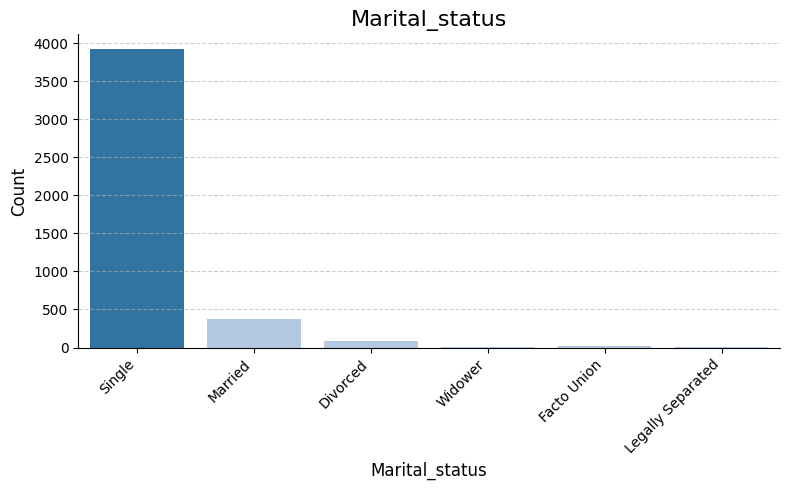

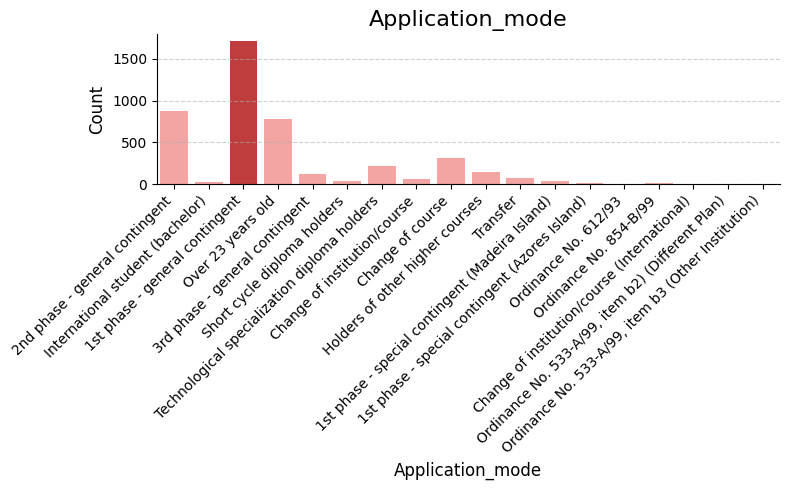

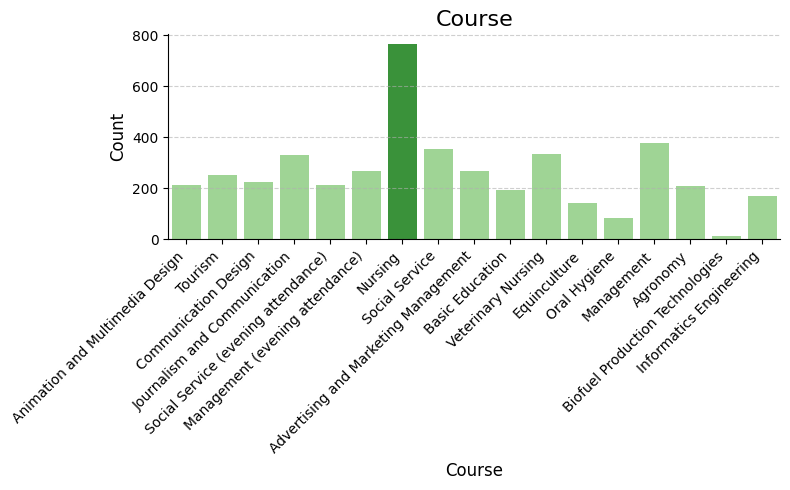

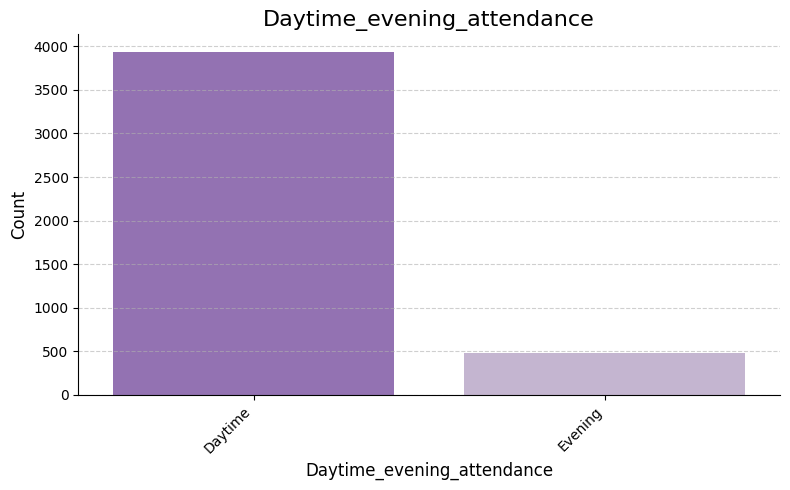

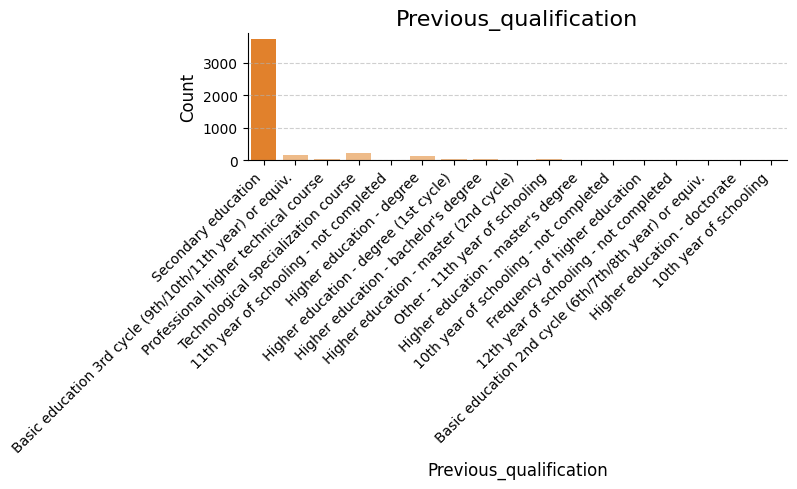

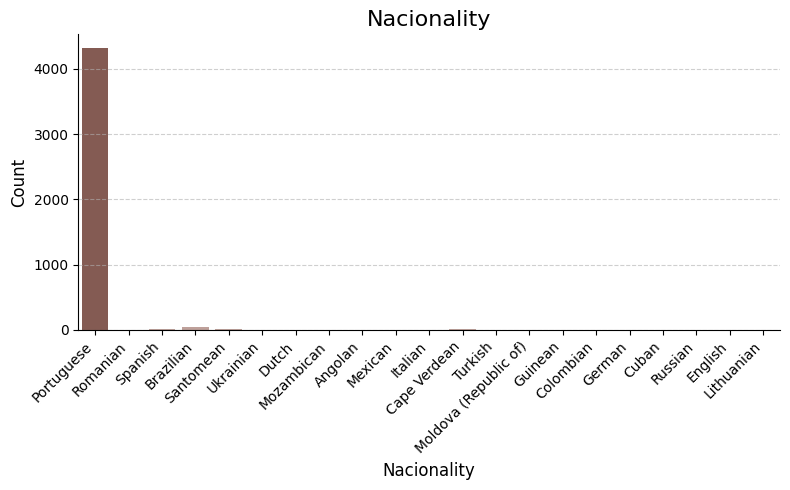

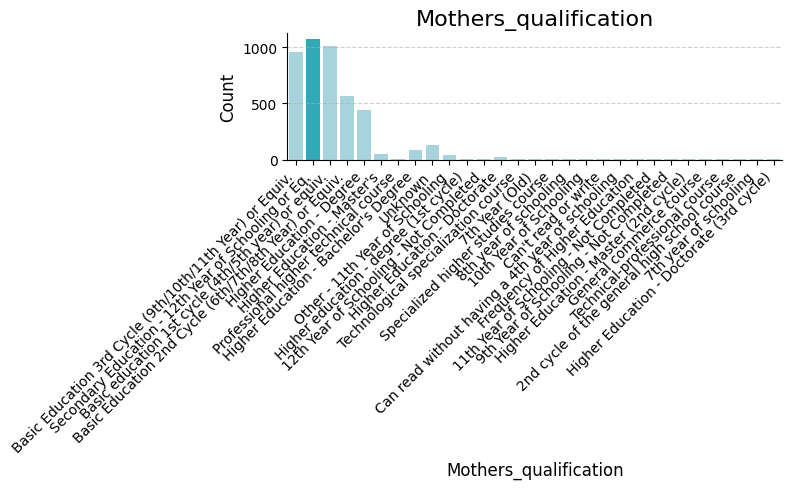

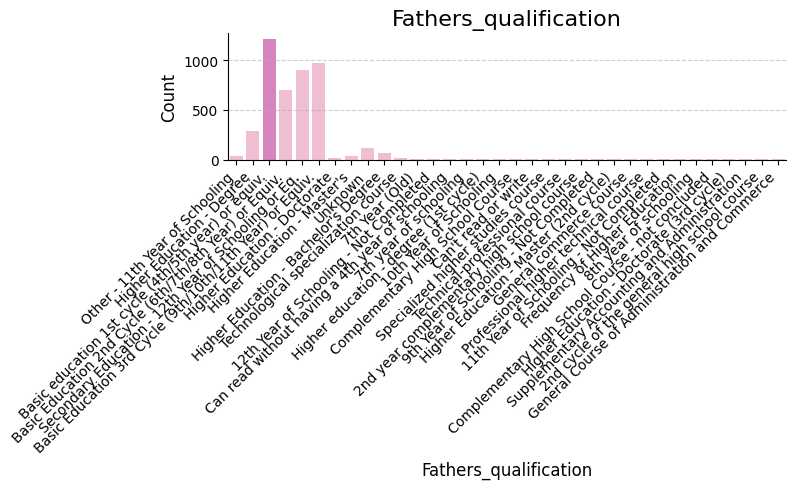

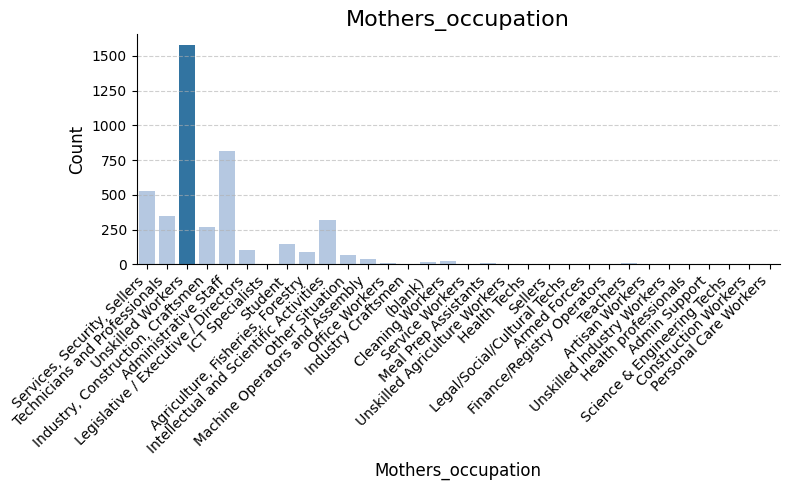

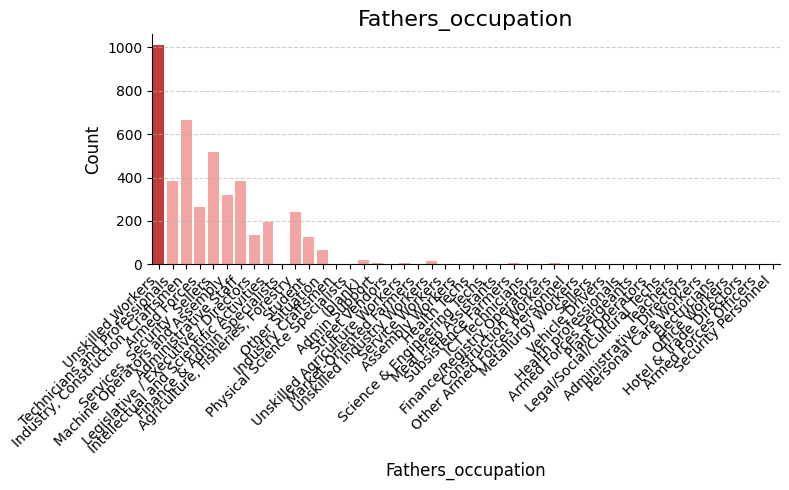

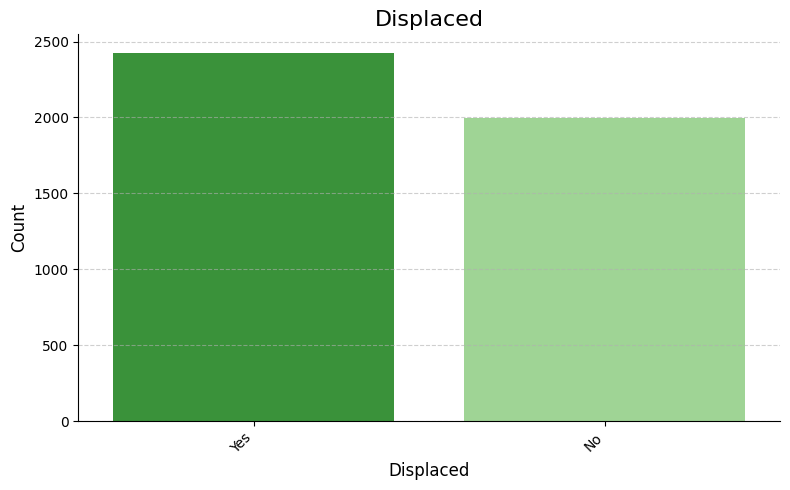

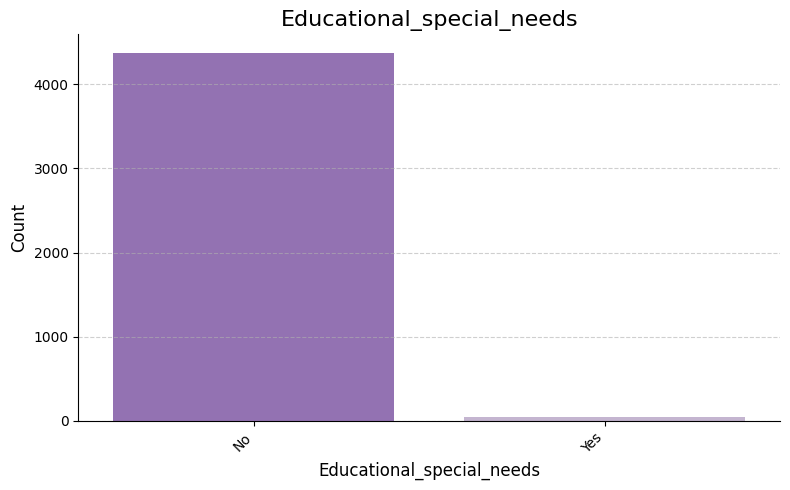

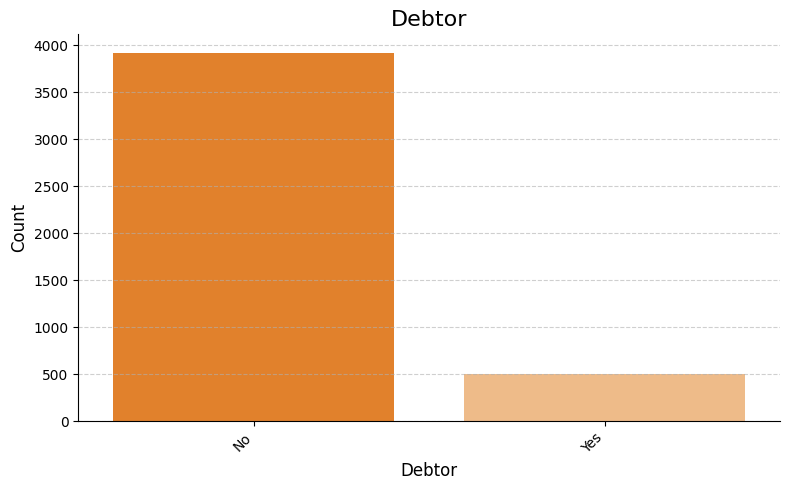

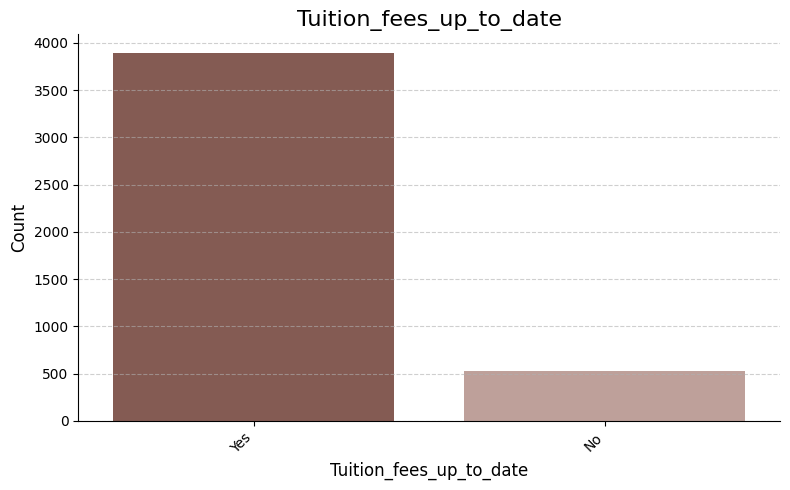

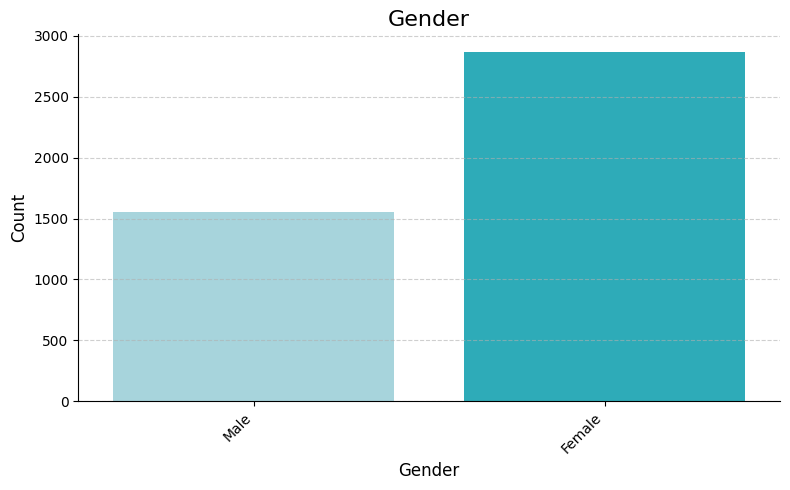

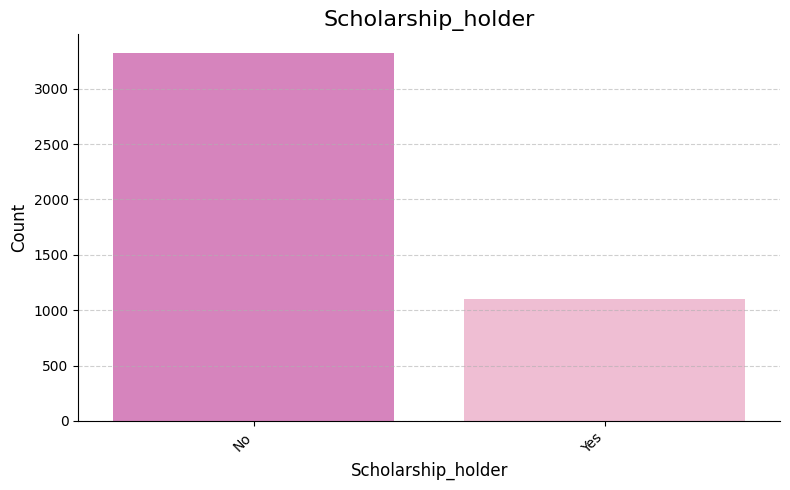

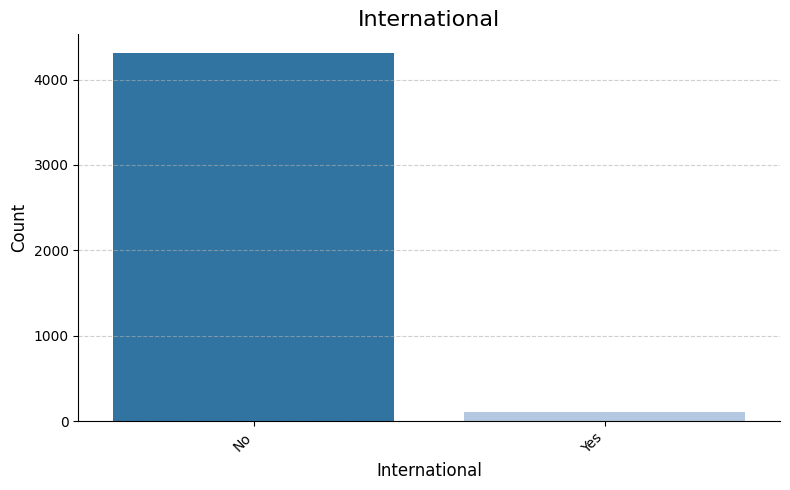

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur kategorikal pada dataset pendidikan
categorical = [
    "Marital_status", "Application_mode",  # ← yang sebelumnya terlewat
    "Course", "Daytime_evening_attendance", "Previous_qualification",
    "Nacionality", "Mothers_qualification", "Fathers_qualification",
    "Mothers_occupation", "Fathers_occupation", "Displaced", "Educational_special_needs", "Debtor",
    "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International"
]


# Daftar pasangan warna (tua, muda)
color_pairs = [
    ('#1f77b4', '#aec7e8'),   # Biru
    ('#d62728', '#ff9896'),   # Merah
    ('#2ca02c', '#98df8a'),   # Hijau
    ('#9467bd', '#c5b0d5'),   # Ungu
    ('#ff7f0e', '#ffbb78'),   # Oranye
    ('#8c564b', '#c49c94'),   # Coklat
    ('#17becf', '#9edae5'),   # Cyan
    ('#e377c2', '#f7b6d2')    # Pink
]

# Loop untuk setiap fitur kategorikal
for i, feature in enumerate(categorical):
    # Pilih pasangan warna sesuai indeks
    color_pair = color_pairs[i % len(color_pairs)]

    # Ambil kategori unik sesuai urutan pertama muncul
    categories = exploratory_df[feature].dropna().unique().tolist()

    # Hitung frekuensi dan kategori terbanyak
    counts = exploratory_df[feature].value_counts()
    max_count = counts.max()
    max_categories = counts[counts == max_count].index.tolist()

    # Tentukan warna berdasarkan frekuensi
    colors = [color_pair[0] if cat in max_categories else color_pair[1] for cat in categories]

    # Plot countplot
    plt.figure(figsize=(8, 5))
    sns.countplot(data=exploratory_df, x=feature, order=categories, palette=colors)

    plt.title(feature, fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    sns.despine()

    plt.tight_layout()
    plt.show()

Dari visualisasi diatas kita bisa melihat rentang nilai untuk fitir kategori

*   grafik berwarna lebih tua menunjukkan nilai tertinggi dari sebuah fitur kategori

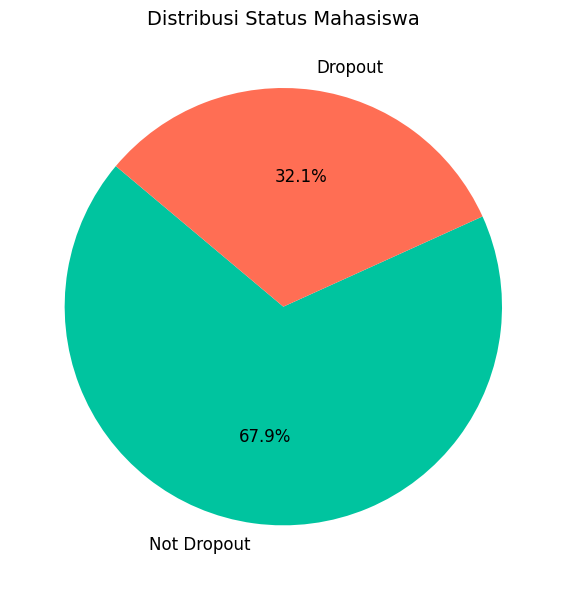

In [ ]:
import matplotlib.pyplot as plt

# Mapping langsung pada kolom Status (tanpa buat kolom baru)
encoding_target = {
    'Graduate': 'Not Dropout',
    'Enrolled': 'Not Dropout',
    'Dropout': 'Dropout'
}

# Ubah nilai di kolom Status
exploratory_df['Status'] = exploratory_df['Status'].map(encoding_target)

# Hitung distribusi
status_counts = exploratory_df['Status'].value_counts()

# Warna menarik
colors = ['#00C49F', '#FF6E54']  # Teal untuk Not Dropout, Oranye untuk Dropout

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Distribusi Status Mahasiswa', fontsize=14)
plt.tight_layout()
plt.show()


disini kita dapat melihat proporsi dari siswa yang dropout dan tidak

In [ ]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(18,63))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

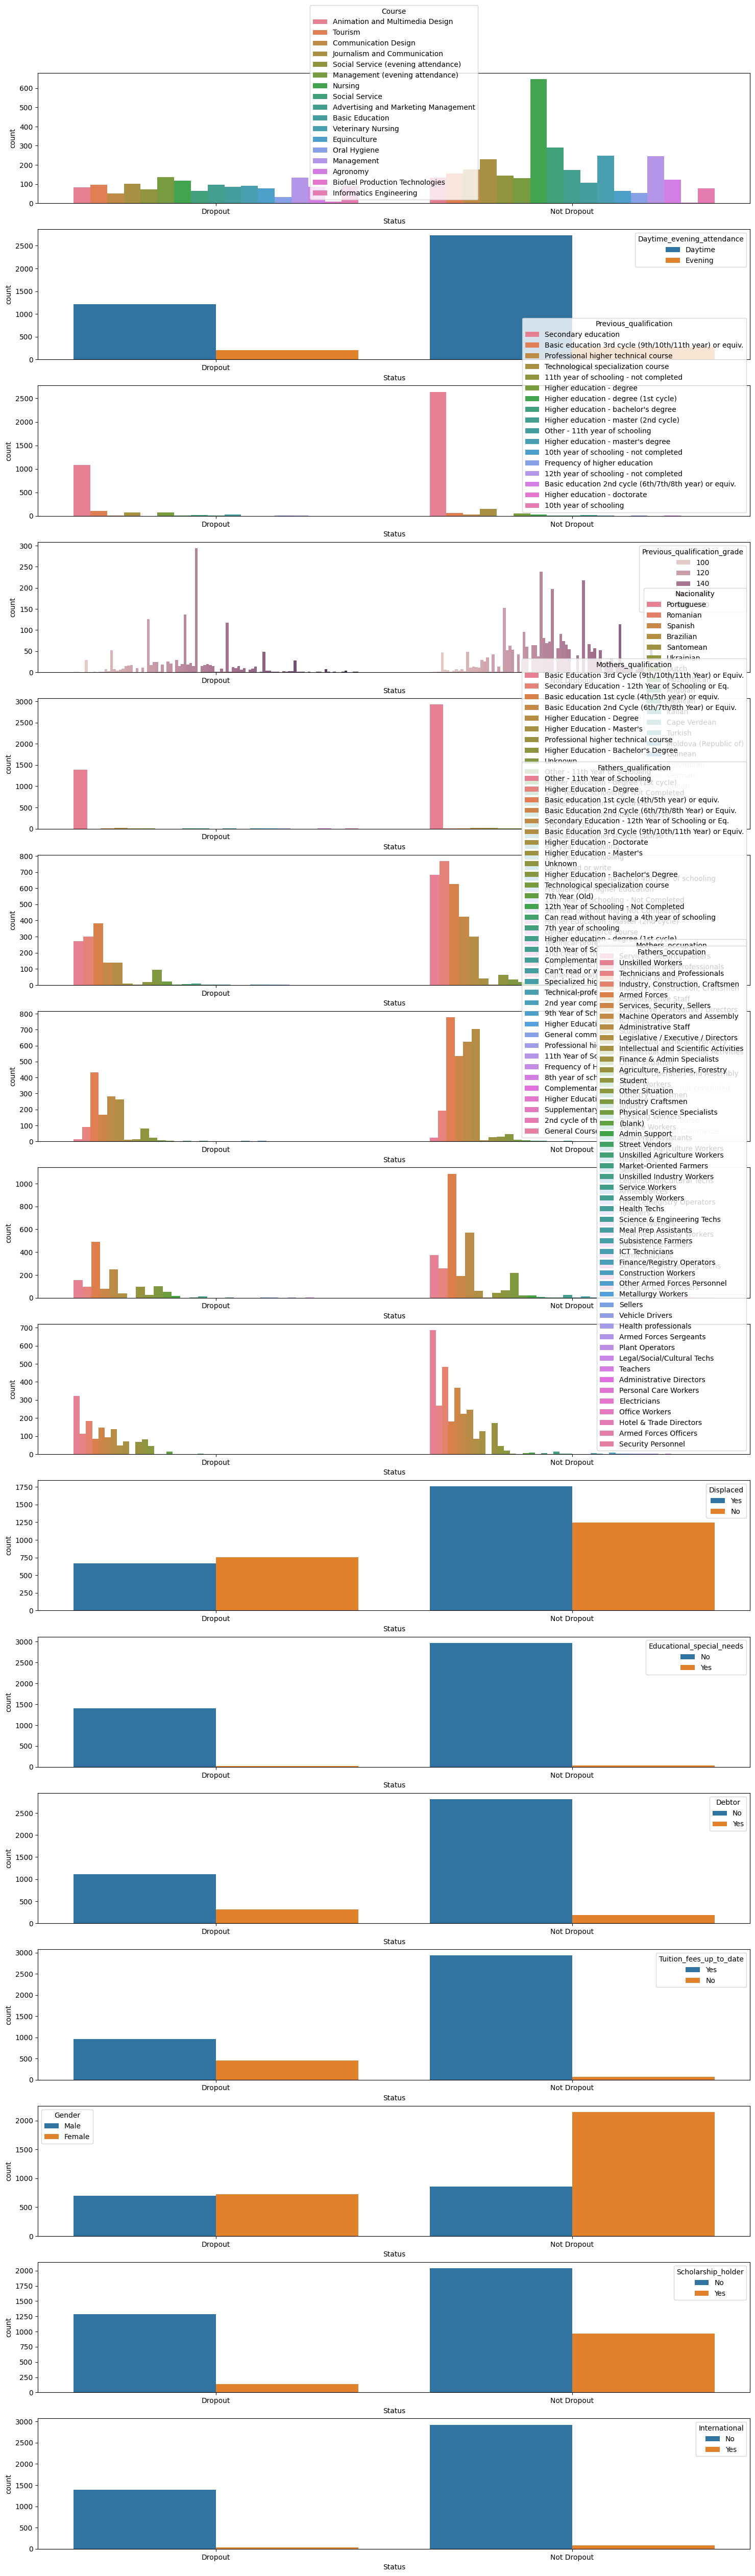

In [ ]:
categorical_plot(
    features=[
    "Course", "Daytime_evening_attendance", "Previous_qualification",
    "Previous_qualification_grade", "Nacionality", "Mothers_qualification", "Fathers_qualification",
    "Mothers_occupation", "Fathers_occupation", "Displaced", "Educational_special_needs", "Debtor",
    "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International"
    ],
    df=exploratory_df,
    segment_feature="Status"
)

Dari visualisasi, kita dapat melihat hubungan antara fitur-fitur kategorikal dengan fitur Status. Meskipun terdapat perbedaan antara siswa yang bertahan (Status = Not Dropout) dan yang keluar (Status = Dropout), sebagian besar fitur tidak menunjukkan pola yang kuat akibat distribusi data yang tidak merata. Namun, fitur Displaced menjadi pengecualian. Grafik menunjukkan bahwa meskipun jumlah siswa yang tidak displaced (Displaced = No) jauh lebih banyak dibandingkan yang displaced (Displaced = Yes), proporsi siswa yang dropout jauh lebih tinggi pada kelompok yang tidak displaced. Hal ini mengindikasikan adanya korelasi antara status pengungsian dengan kemungkinan siswa untuk keluar dari pendidikan.

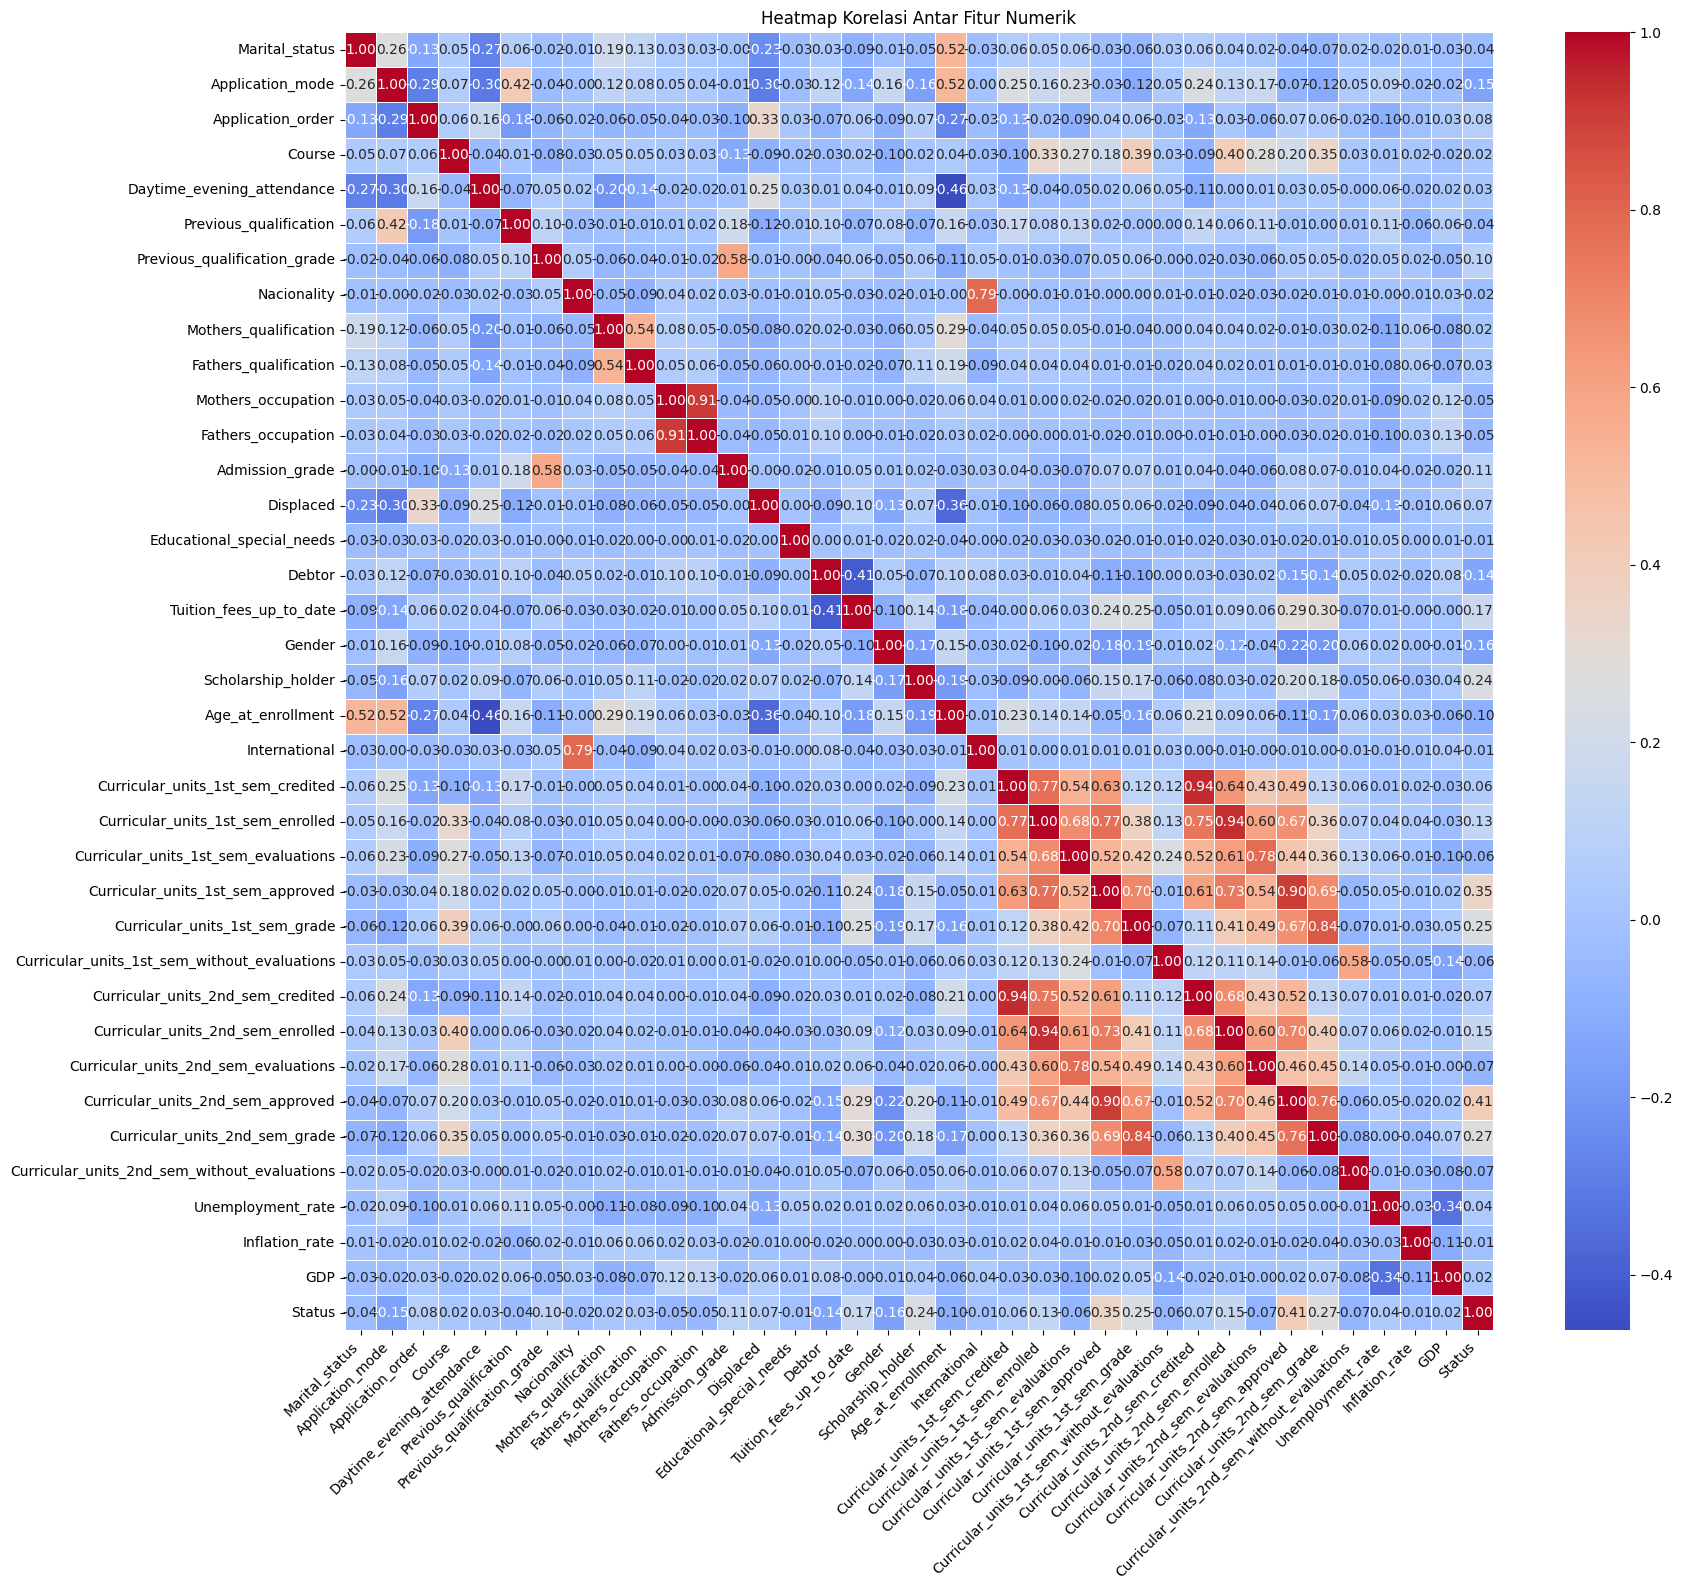

In [ ]:
# Ambil hanya kolom numerik dari students_df
numeric_df = students_df.select_dtypes(include=['int64', 'float64']).copy()

# Tambahkan juga kolom target 'Status' jika ingin analisis terhadapnya
numeric_df["Status"] = students_df["Status"].map({"Enrolled": 0, "Dropout": 1, "Graduate": 2})

# Hitung korelasi antar fitur numerik
corr_matrix = numeric_df.corr(numeric_only=True)

# Tampilkan heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dari visualisasi confusion matrix di atas, kita dapat menilai sejauh mana model mampu membedakan antara siswa yang keluar (Status = Dropout) dan yang tetap melanjutkan studi (Status = Not Dropout). Meskipun confusion matrix tidak secara eksplisit menampilkan fitur-fitur yang paling berpengaruh, pola kesalahan prediksi yang terlihat—seperti jumlah false positives dan false negatives—dapat memberikan petunjuk bahwa terdapat fitur-fitur tertentu yang memiliki pengaruh kuat terhadap prediksi Status. Oleh karena itu, analisis lanjutan seperti feature importance diperlukan untuk mengidentifikasi fitur-fitur yang paling memengaruhi kemungkinan siswa untuk dropout secara lebih spesifik.

In [ ]:
exploratory_df.to_csv('students_performance_processed.csv', index=False)

menyimpan dataset students_performance_processed untuk analisis lebih lanjut dan membuat dashboard

# Data Preparation / Preprocessing

In [ ]:
# data model
from sklearn.preprocessing import LabelEncoder
df_model = exploratory_df.copy()

In [ ]:
x = df_model.drop("Status", axis=1)
y = df_model["Status"]

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

x_train.shape, x_test.shape

((3539, 36), (885, 36))

In [ ]:
df_model

Marital_status                  Application_mode  Application_order  \
0            Single    2nd phase - general contingent                  5   
1            Single  International student (bachelor)                  1   
2            Single    1st phase - general contingent                  5   
3            Single    2nd phase - general contingent                  2   
4           Married                 Over 23 years old                  1   
...             ...                               ...                ...   
4419         Single    1st phase - general contingent                  6   
4420         Single    1st phase - general contingent                  2   
4421         Single    1st phase - general contingent                  1   
4422         Single    1st phase - general contingent                  1   
4423         Single            Ordinance No. 854-B/99                  1   

                                   Course Daytime_evening_attendance  \
0         Animation and Multimedia Design                    Daytime   
1                                 Tourism                    Daytime   
2                    Communication Design                    Daytime   
3            Journalism and Communication                    Daytime   
4     Social Service (evening attendance)                    Evening   
...                                   ...                        ...   
4419         Journalism and Communication                    Daytime   
4420         Journalism and Communication                    Daytime   
4421                              Nursing                    Daytime   
4422                           Management                    Daytime   
4423         Journalism and Communication                    Daytime   

     Previous_qualification  Previous_qualification_grade   Nacionality  \
0       Secondary education                         122.0    Portuguese   
1       Secondary education                         160.0    Portuguese   
2       Secondary education                         122.0    Portuguese   
3       Secondary education                         122.0    Portuguese   
4       Secondary education                         100.0    Portuguese   
...                     ...                           ...           ...   
4419    Secondary education                         125.0    Portuguese   
4420    Secondary education                         120.0       Russian   
4421    Secondary education                         154.0    Portuguese   
4422    Secondary education                         180.0    Portuguese   
4423    Secondary education                         152.0  Cape Verdean   

                                         Mothers_qualification  \
0     Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
1          Secondary Education - 12th Year of Schooling or Eq.   
2           Basic education 1st cycle (4th/5th year) or equiv.   
3       Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.   
4           Basic education 1st cycle (4th/5th year) or equiv.   
...                                                        ...   
4419       Secondary Education - 12th Year of Schooling or Eq.   
4420       Secondary Education - 12th Year of Schooling or Eq.   
4421        Basic education 1st cycle (4th/5th year) or equiv.   
4422        Basic education 1st cycle (4th/5th year) or equiv.   
4423    Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.   

                                       Fathers_qualification  \
0                             Other - 11th Year of Schooling   
1                                  Higher Education - Degree   
2         Basic education 1st cycle (4th/5th year) or equiv.   
3         Basic education 1st cycle (4th/5th year) or equiv.   
4     Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.   
...                                                      ...   
4419     Secondary Education - 12th Year of Schooling or Eq.   
4420     Secondary Ed

In [ ]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = RobustScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = RobustScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()

        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])

            # Transformasi training set
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")

            # Tangani unseen labels di test set
            known_classes = set(encoder.classes_)

            def safe_transform(val):
                if val in known_classes:
                    return encoder.transform([val])[0]
                else:
                    return -1  # Ganti NaN dengan -1


            df_test[feature] = df_test[feature].map(safe_transform)

            if df_test[feature].isna().sum() > 0:
                print(f"⚠️ Warning: Fitur '{feature}' mengandung label tidak dikenal dan diberi NaN.")

        return df, df_test

    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")
        return df


In [ ]:
new_x_train, new_x_test = scaling(numerical, x_train, x_test)
new_x_train, new_x_test = encoding(categorical, new_x_train, new_x_test)

In [ ]:
encoding_target = {
    'Not Dropout':0,
    'Dropout' :1
}

decoding_target = {
    0: 'Not Dropout',
    1: 'Dropout'
}


new_y_train = y_train.map(encoding_target).values
new_y_test = y_test.map(encoding_target).values

In [ ]:
x_train_pca = new_x_train.copy().reset_index(drop=True)
x_test_pca = new_x_test.copy().reset_index(drop=True)

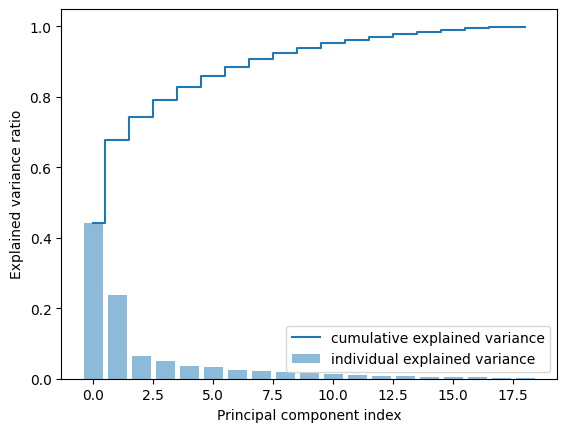

In [ ]:
pca = PCA(n_components=len(numerical), random_state=123)
princ_comp = pca.fit_transform(x_train_pca[numerical])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(numerical)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(numerical)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
pca = PCA(n_components=5, random_state=123)
pca.fit(x_train_pca[numerical])
joblib.dump(pca, "model/pca.joblib")
princ_comp = pca.transform(x_train_pca[numerical])
x_train_pca[["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"]] = pd.DataFrame(princ_comp, columns=["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"])
x_train_pca.drop(columns=numerical, axis=1, inplace=True)
x_train_pca.head()

Marital_status  Application_mode  Course  Daytime_evening_attendance  \
0               4                 5      12                           0   
1               4                14      10                           1   
2               4                 0      16                           0   
3               4                14      11                           0   
4               4                 4       1                           0   

   Previous_qualification  Nacionality  Mothers_qualification  \
0                      13           14                     23   
1                      13           14                      9   
2                      13           14                      8   
3                      13           14                     15   
4                      13           14                     23   

   Fathers_qualification  Mothers_occupation  Fathers_occupation  Displaced  \
0                     11                  24                  33          1   
1                      9                  30                  41          0   
2                      9                   2                  41          0   
3                     10                  13                  33          0   
4                      9                  30                   4          0   

   Educational_special_needs  Debtor  Tuition_fees_up_to_date  Gender  \
0                          0       0                        1       1   
1                          0       0                        0       1   
2                          0       0                        1       1   
3                          0       0                        1       0   
4                          0       0                        1       1   

   Scholarship_holder  International      pc_1      pc_2      pc_3      pc_4  \
0                   0              0  0.888942  2.332483 -0.523943  0.212392   
1                   0              0 -4.165108 -4.792093  0.391426 -1.314072   
2                   1              0  0.610172  3.017965 -0.622109  1.159004   
3                   0              0  1.051807  1.622211 -0.944061 -0.276639   
4                   0              0  6.036269 -1.626190  0.133851 -0.613010   

       pc_5  
0 -0.374499  
1 -0.490357  
2 -0.427096  
3 -0.974795  
4 -1.117397

In [ ]:
test_princ_comp = pca.transform(x_test_pca[numerical])
x_test_pca[["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"]] = pd.DataFrame(test_princ_comp, columns=["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"])
x_test_pca.drop(columns=numerical, axis=1, inplace=True)
x_test_pca.head()

Marital_status  Application_mode  Course  Daytime_evening_attendance  \
0               4                14      14                           1   
1               4                 0      11                           0   
2               4                 0      16                           0   
3               4                 2       9                           0   
4               4                14       1                           0   

   Previous_qualification  Nacionality  Mothers_qualification  \
0                      13           14                     10   
1                      13           14                      8   
2                      13           14                      8   
3                      13           14                      8   
4                      13           14                     10   

   Fathers_qualification  Mothers_occupation  Fathers_occupation  Displaced  \
0                     11                  30                  41          0   
1                     11                  12                  16          1   
2                     27                  30                  41          1   
3                     11                  30                  41          1   
4                     11                  30                  41          0   

   Educational_special_needs  Debtor  Tuition_fees_up_to_date  Gender  \
0                          0       0                        1       0   
1                          0       0                        1       0   
2                          0       0                        1       0   
3                          0       0                        1       0   
4                          0       1                        0       0   

   Scholarship_holder  International      pc_1      pc_2      pc_3      pc_4  \
0                   0              0  0.384928  2.298044 -0.719144  0.622791   
1                   0              0  0.790055  2.454661  1.898677 -0.671207   
2                   1              0 -0.492253  1.963695  0.935106 -0.405277   
3                   1              0 -0.781468  1.065355 -0.077891 -0.115190   
4                   0              0 -3.875801 -5.471721 -2.020201 -2.443851   

       pc_5  
0  1.146426  
1  0.124305  
2 -0.520839  
3 -0.584334  
4  1.700887

In [ ]:
x_train_pca.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

# Modeling

In [ ]:
logreg = LogisticRegression(random_state=123)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=123)

In [ ]:
# model benchmarking
models = [logreg, knn, dtree]

# define an evaluation metrics
recall_mean = []
recall_std = []
recall_all = []
recall_name = []

# find the best model
for model in models:
    model_cv = cross_val_score(
        model,
        x_train_pca,
        new_y_train,
        cv=5,
        scoring='recall'
    )

    recall_name.append(model.__class__.__name__)
    recall_mean.append(model_cv.mean())
    recall_std.append(model_cv.std())
    recall_all.append(model_cv.round(4))

# Evaluation

In [ ]:
# train score
train_score = pd.DataFrame(
    {
        'model': recall_name,
        'train - recall mean': recall_mean,
        'train - recall std': recall_std,
        'train - recall all': recall_all
    }
).sort_values('train - recall mean', ascending=False)

train_score

model  train - recall mean  train - recall std  \
0      LogisticRegression             0.664097            0.044534   
2  DecisionTreeClassifier             0.655263            0.020933   
1    KNeighborsClassifier             0.442387            0.029392   

                         train - recall all  
0   [0.674, 0.6608, 0.6535, 0.5965, 0.7357]  
2   [0.6696, 0.6608, 0.6623, 0.614, 0.6696]  
1  [0.4317, 0.4185, 0.4825, 0.4079, 0.4714]

In [ ]:
# test score
models = [logreg, knn, dtree]

# evaluation
recall_scores = []
model_name = []

for model in models:
    # fitting
    model.fit(x_train_pca, new_y_train)

    # model predict
    y_pred_test = model.predict(x_test_pca)

    # evaluate
    model_name.append(model.__class__.__name__)
    recall = recall_score(y_pred_test, new_y_test)
    recall_scores.append(recall)

In [ ]:
test_score = pd.DataFrame(
    {
        'model': model_name,
        'test - recall': recall_scores
    }
).sort_values('test - recall', ascending=False)

test_score

model  test - recall
0      LogisticRegression       0.822034
1    KNeighborsClassifier       0.711230
2  DecisionTreeClassifier       0.664384

In [ ]:
train_test_score = train_score.merge(test_score)
train_test_score

model  train - recall mean  train - recall std  \
0      LogisticRegression             0.664097            0.044534   
1  DecisionTreeClassifier             0.655263            0.020933   
2    KNeighborsClassifier             0.442387            0.029392   

                         train - recall all  test - recall  
0   [0.674, 0.6608, 0.6535, 0.5965, 0.7357]       0.822034  
1   [0.6696, 0.6608, 0.6623, 0.614, 0.6696]       0.664384  
2  [0.4317, 0.4185, 0.4825, 0.4079, 0.4714]       0.711230

In [ ]:
train_test_score['difference'] = train_test_score['train - recall mean'] - train_test_score['test - recall']
train_test_score.sort_values('difference', ascending=True)

model  train - recall mean  train - recall std  \
2    KNeighborsClassifier             0.442387            0.029392   
0      LogisticRegression             0.664097            0.044534   
1  DecisionTreeClassifier             0.655263            0.020933   

                         train - recall all  test - recall  difference  
2  [0.4317, 0.4185, 0.4825, 0.4079, 0.4714]       0.711230   -0.268843  
0   [0.674, 0.6608, 0.6535, 0.5965, 0.7357]       0.822034   -0.157937  
1   [0.6696, 0.6608, 0.6623, 0.614, 0.6696]       0.664384   -0.009120

disini kita dapat memlihat bahwa LogisticRegression adalah model terbaik dengan nilai recall tertinggi

# Hyperparameter tuning

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],               # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Regularization parameter
    'solver': ['liblinear', 'saga'],       # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400]        # Maximum number of iterations for the solvers
}

In [ ]:
logreg = LogisticRegression(C=1, penalty='l1', solver='saga', random_state=123)
logreg.fit(x_train_pca, new_y_train)
joblib.dump(logreg, 'model/tuned_logreg_model.joblib')

['model/tuned_logreg_model.joblib']

# Evaluation

In [ ]:
y_train_pred = logreg.predict(x_train_pca)
y_train_pred = pd.Series(y_train_pred).map(decoding_target)
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

     Dropout       0.83      0.67      0.74      1137
 Not Dropout       0.86      0.93      0.89      2402

    accuracy                           0.85      3539
   macro avg       0.84      0.80      0.82      3539
weighted avg       0.85      0.85      0.84      3539



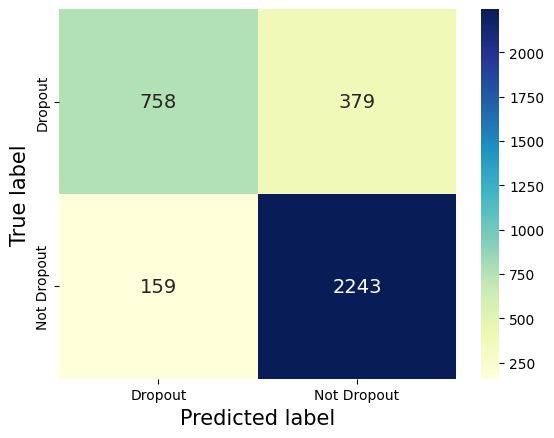

In [ ]:
labels = ['Dropout', 'Not Dropout']
cnf_matrix = confusion_matrix(y_train, y_train_pred, labels=labels)
cnf_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
sns.heatmap(cnf_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()

In [ ]:
y_test_pred = logreg.predict(x_test_pca)
y_test_pred = pd.Series(y_test_pred).map(decoding_target)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.82      0.68      0.74       284
 Not Dropout       0.86      0.93      0.89       601

    accuracy                           0.85       885
   macro avg       0.84      0.80      0.82       885
weighted avg       0.85      0.85      0.84       885



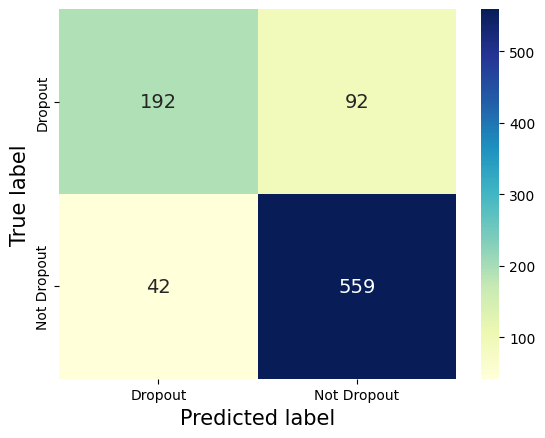

In [ ]:
labels = ['Dropout', 'Not Dropout']
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=labels)
cnf_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
sns.heatmap(cnf_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!cat requirements.txt

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.5.5.0.38.14
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.3.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet=